# THE SPARKS FOUNDATION GRIP TASK - 6

## AUTHOR: MALLIKA ADAK

### DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP, JULY - 2021

#### TASK -6: PREDICTION USING DECISION TREE ALGORITHM

OBJECTIVE: To create the Decision Tree classiﬁer and predict the right class accordingly by visualizing it graphically 

DATASET: https://bit.ly/3kXTdox 

### 1) Importing all the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore the warnings 
import warnings as wg
wg.filterwarnings("ignore")
%matplotlib inline

### 2) Reading the Data from the Source

In [2]:
dataset = pd.read_csv("D:\MALLIKA\Iris.csv")
print("Data set imported successfully")

dataset.head()

Data set imported successfully


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### 3) Familiarizing with Data

In [3]:
#Shape of dataframe
dataset.shape

(150, 6)

In [4]:
# Determining the different columns in the dataset
dataset.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
#Information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
#checking for number of null value
dataset.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
# Describing the dataset by various parameters
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
#count by Species
dataset.groupby(['Species']).count()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,50,50,50,50,50
Iris-versicolor,50,50,50,50,50
Iris-virginica,50,50,50,50,50


In [9]:
# Evaluating correlation coefficient 
dataset.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


### 4) Visualization of data

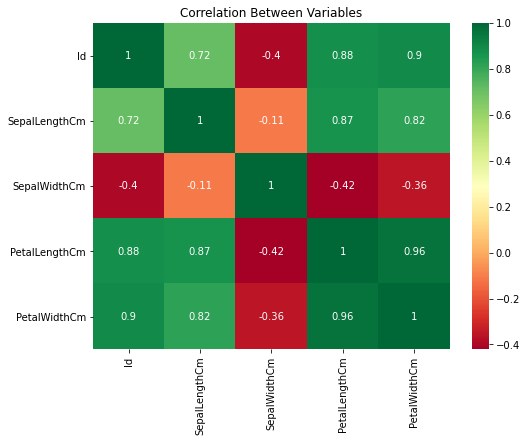

In [10]:
# plotting the heatmap of correlation matrix using seaborn
fig=plt.figure(figsize=(8,6))
sns.heatmap(dataset.corr(), annot=True, cmap='RdYlGn')
plt.title('Correlation Between Variables')
plt.show()

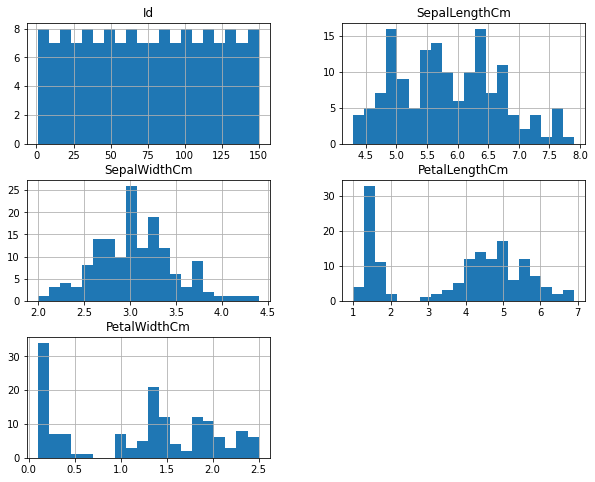

In [11]:
# Plotting Histogram
dataset.hist(bins = 20,figsize = (10,8));

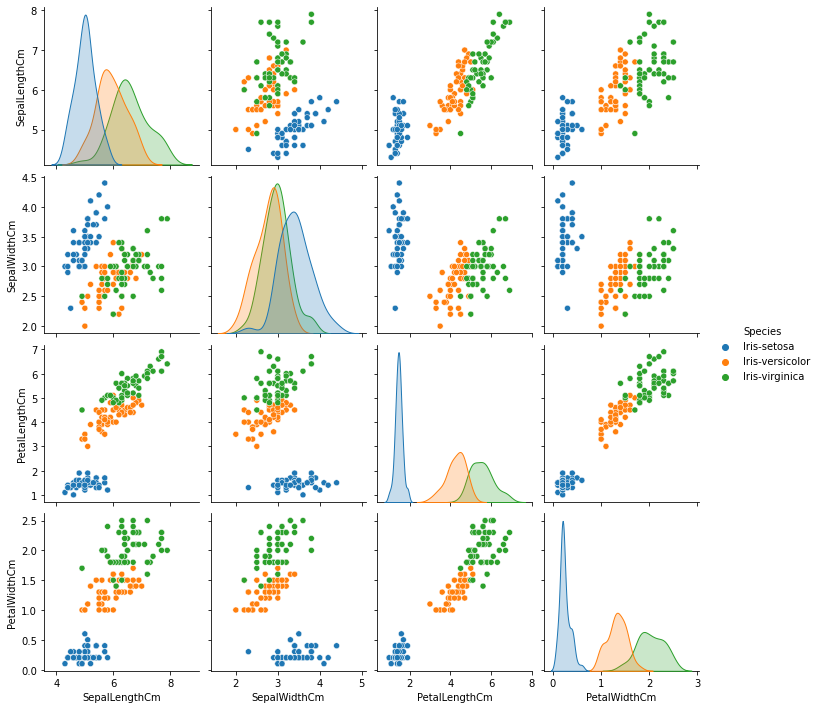

In [12]:
sns.pairplot(dataset[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']],hue="Species", diag_kind="kde");

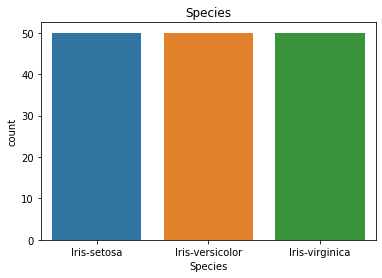

In [13]:
#countplot for Species
sns.countplot(dataset['Species'])
plt.title('Species')
plt.show()

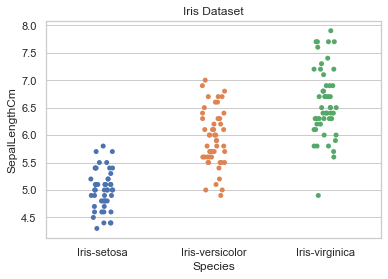

In [14]:
sns.set(style = 'whitegrid')
sns.stripplot(dataset['Species'], dataset['SepalLengthCm']);
plt.title('Iris Dataset')
plt.show()

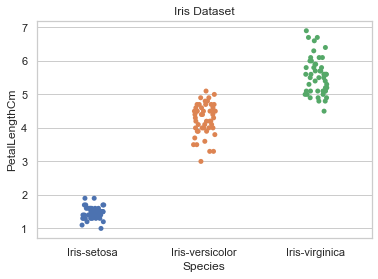

In [15]:
sns.set(style = 'whitegrid')
sns.stripplot(dataset['Species'], dataset['PetalLengthCm']);
plt.title('Iris Dataset')
plt.show()

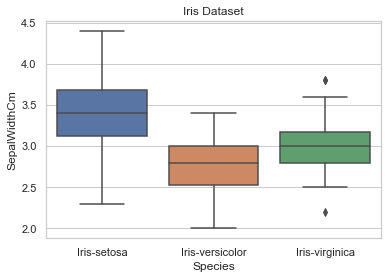

In [16]:
sns.boxplot(dataset['Species'], dataset['SepalWidthCm'])
plt.title("Iris Dataset")
plt.show()

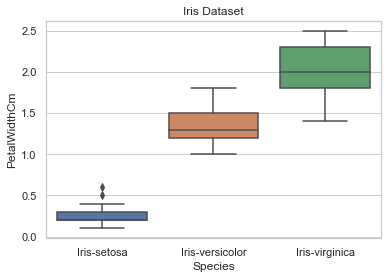

In [17]:
sns.boxplot(dataset['Species'], dataset['PetalWidthCm'])
plt.title("Iris Dataset")
plt.show()

### 5) Splitting the Data 

In [18]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
dataset["spc_code"] = lb_make.fit_transform(dataset.Species)

In [19]:
X = dataset.iloc[:,1:5].values
y = dataset['spc_code'].values

In [20]:
# Splitting the dataset into train and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 0)
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((135, 4), (15, 4), (135,), (15,))

### 6) Model Training 

In [21]:
# Decision Tree regression model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
dtc = DecisionTreeClassifier()
# fit the model 
dtc.fit(X_train, y_train)
print("Training Complete.")

Training Complete.


### 7) Comparing Actual and Predicted Values

In [22]:
#predicting the target value from the model for the samples
y_pred = dtc.predict(X_test)

In [23]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df

,Actual,Predicted
0,2,2
1,1,1
2,0,0
3,2,2
4,0,0
5,2,2
6,0,0
7,1,1
8,1,1
9,1,1


### 8) Accuracy of the model and Confusion Matrix

In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_test, y_pred)

array([[3, 0, 0],
       [0, 8, 0],
       [0, 0, 4]], dtype=int64)

We got an accuracy score of : 100.0 %


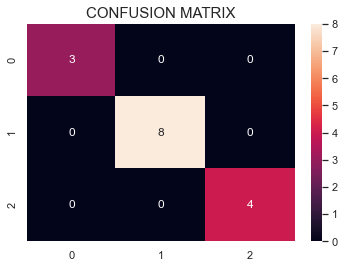

In [25]:
acc = accuracy_score(y_test, y_pred)
con_mat = confusion_matrix(y_test, y_pred)
print('We got an accuracy score of : {} %'.format(acc*100))
sns.heatmap(con_mat,annot=True)
plt.title('CONFUSION MATRIX',fontsize='15')
plt.show()

### 9) Decision Tree Visualization

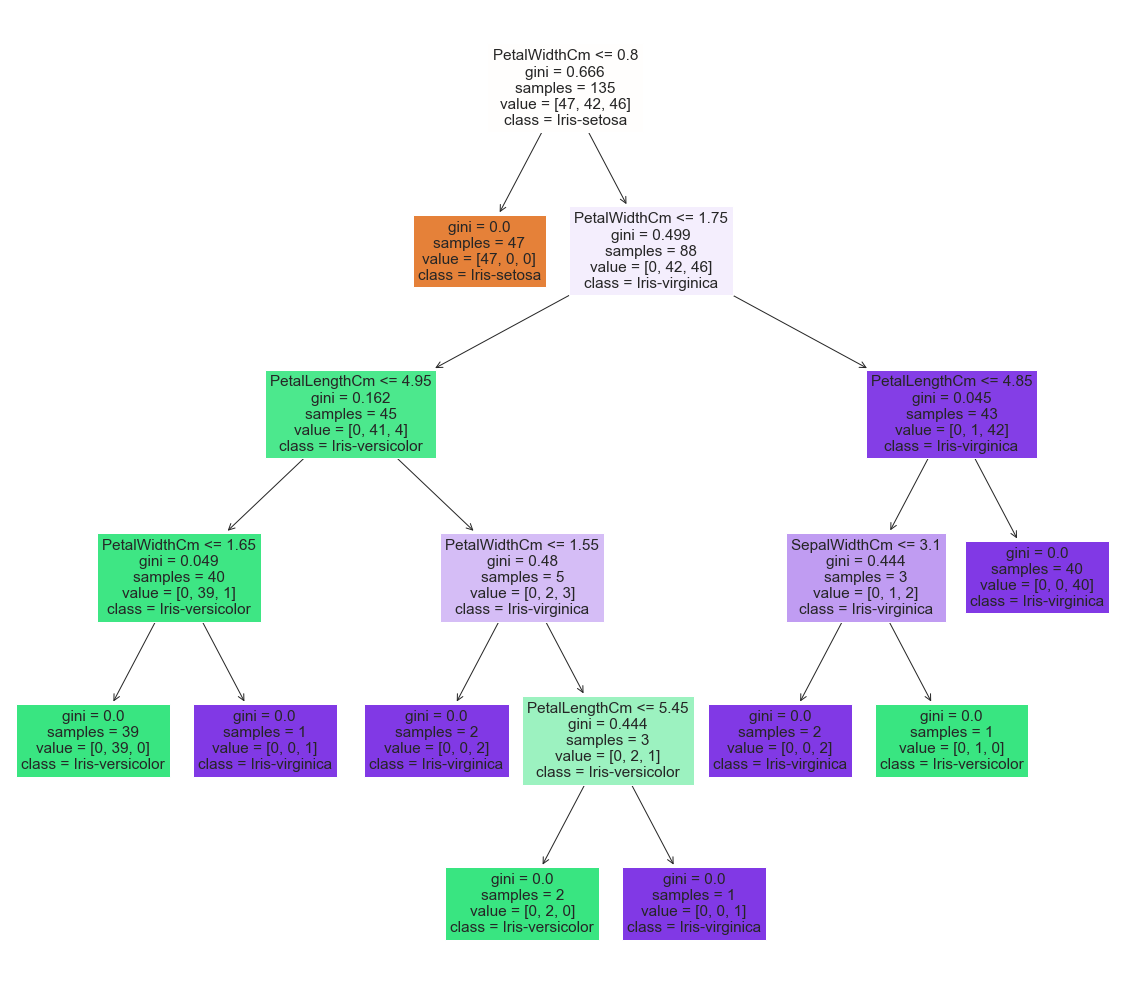

In [26]:
#importing tree function for Visualization

from sklearn import tree
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,18))
tree.plot_tree(dtc,feature_names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'] ,
               class_names = dataset['Species'].unique(), filled=True)
plt.show()

**CONCLUSION**

I was able to successfully carry-out Prediction using Decision Tree Algorithm and was able to evaluate the model's accuracy score.